In [24]:
import numpy as np
import matplotlib.pyplot as plt
import rospkg
import yaml
import pandas as pd
from glob import glob

In [25]:
rospack = rospkg.RosPack()
package_path = rospack.get_path('calculate_moi')
txt_path = package_path + '/3d_models/txt_models'
yaml_path = package_path + '/3d_models/Inertial_matrix'


https://drububu.com/miscellaneous/voxelizer/?out=txt
link to tool to convert stl into .txt

In [48]:
def return_moi(file_path):
    coords = np.loadtxt(file_path, unpack=True, delimiter=',', dtype=int)
    coords[[1, 2]] = coords[[2, 1]]
    coords = coords/max(coords.ravel())
    # print(np.shape(coords))
    x, y, z = coords
    x_mean, y_mean = np.mean(x), np.mean(y)
    z_max = max(z)
    P0 = x0, y0, z0 = x_mean, y_mean, z_max
    coords = coords.T - P0
    coords = coords.T
    x, y, z = coords
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x,y,z)
    ax.view_init(elev=20)
    N = coords.shape[1]
    Ix = sum(coords[1]**2 + coords[2]**2)/N
    Iy = sum(coords[0]**2 + coords[2]**2)/N
    Iz = sum(coords[0]**2 + coords[1]**2)/N
    Ixy = sum(coords[0]*coords[1])/N
    Iyz = sum(coords[1]*coords[2])/N
    Ixz = sum(coords[0]*coords[2])/N

    I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
    I.tolist()
    print(I[1])
    k = [
        {'Ixx' : float(I[0][0])},
        {'Ixy' : float(I[0][1])},
        {'Ixz' : float(I[0][2])},
        {'Iyx' : float(I[1][0])},
        {'Iyy' : float(I[1][1])},
        {'Iyz' : float(I[1][2])},
        {'Izx' : float(I[2][0])},
        {'Izy' : float(I[2][1])},
        {'Izz' : float(I[2][2])},
        ]
    # k = {'ixx':Ix}
    return k

In [49]:
def create_yamls(file_path, data):
    with open(file_path, 'w') as file:
        # data = return_moi()
        documents = yaml.dump(data, file)
        
        


[-1.59192588e-05  3.14057592e-01 -6.08569261e-04]
[-5.27598153e-05  3.82769210e-01 -1.36581661e-03]
[ 1.07242632e-05  1.23799313e-01 -3.24634006e-05]
[-2.37398806e-05  4.31785527e-01  1.46390394e-06]
[1.30058914e-05 1.56870871e-01 3.44815978e-06]
[-3.87414706e-04  1.66674194e-01  5.80101776e-06]
[0.00034764 0.28429001 0.00059531]


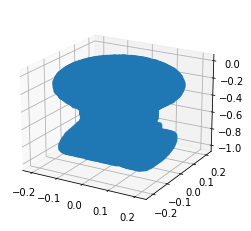

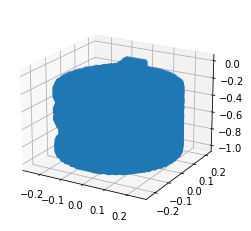

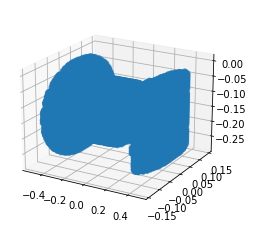

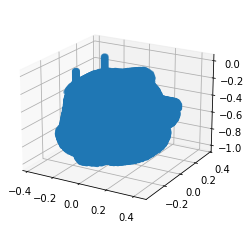

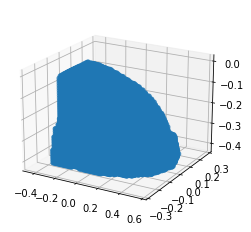

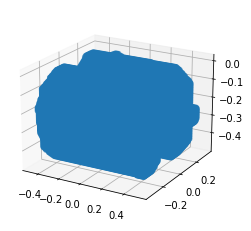

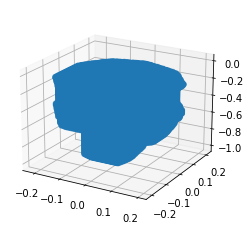

In [50]:
def main():
    path_list = glob(txt_path + '/*')
    for i in path_list:
        data = return_moi(i)
        full_name = yaml_path + '/' + i[59:][:-3] + 'yaml'
        # print(full_name)
        create_yamls(full_name, data)


main()

In [10]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[ 4.28414027e-01, -2.37398806e-05,  2.27012553e-03],
       [-2.37398806e-05,  4.31785527e-01,  1.46390394e-06],
       [ 2.27012553e-03,  1.46390394e-06,  8.74223685e-02]])

[
    Ixx, Ixy, Ixz,
    Iyx, Iyy, Iyz,
    Izx, Izy, Izz,
]